In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv("mnist_train_small.csv", header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Mnist - Digit recognition dataset
# Image is embedded inside the csv file
# 28*28 -> flattened -> fitting into a csv file

# 785 -> 1 column (output), 784 (image)
# pixel range - (0-255)
# 0 - black
# 255 - white

In [4]:
data.isnull().sum().any()


False

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB


In [6]:
# dividing features and targets

X = data.iloc[:, 1:].values
Y = data.iloc[:, 0].values

X.shape, Y.shape

((20000, 784), (20000,))

In [7]:
X.max()

255

In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
X.shape

(20000, 784)

In [10]:
def PlotImage(X, Y):
    idx = np.random.choice(X.shape[0])
    label = Y[idx]
    print(" Target : ", label)
    x = X[idx, :]
    x = x.reshape(28,28)
    plt.imshow(x) 

 Target :  0


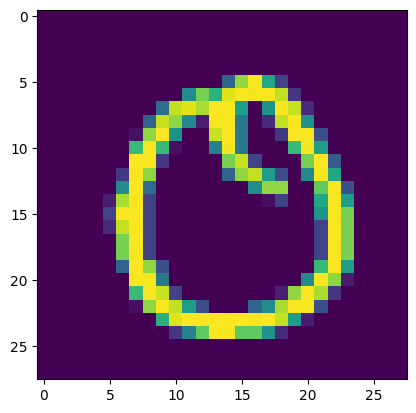

In [11]:
PlotImage(X,Y)

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=4)

print(" training Data shape : ", Xtrain.shape, Ytrain.shape)
print(" testing Data shape : ", Xtest.shape, Ytest.shape)

 training Data shape :  (16000, 784) (16000,)
 testing Data shape :  (4000, 784) (4000,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(Xtrain, Ytrain)

KNeighborsClassifier()

In [14]:
%time predictions = model.predict(Xtest)

CPU times: user 7.12 s, sys: 231 ms, total: 7.35 s
Wall time: 3.38 s


In [15]:

# model.score() -> regression - R2score
#----------------> classification - accuracy

model.score(Xtest, Ytest)

0.95925

In [16]:
# Selection of K

for k in [3,5,7,9]:
    print("  K :  ", k)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtrain, Ytrain)
    print(" Accuracy : ", model.score(Xtest, Ytest))


  K :   3
 Accuracy :  0.9615
  K :   5
 Accuracy :  0.95925
  K :   7
 Accuracy :  0.958
  K :   9
 Accuracy :  0.95575


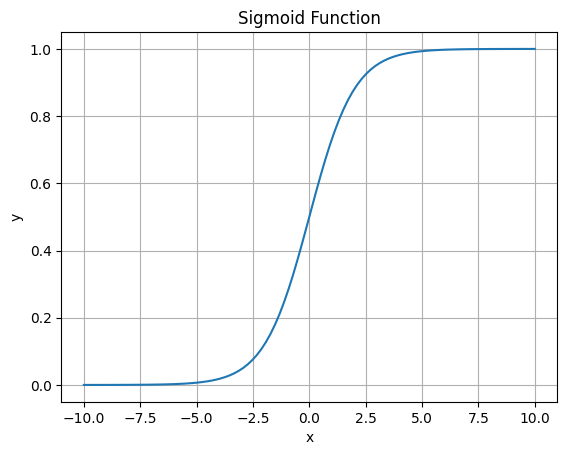

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sigmoid Function')
plt.grid()
plt.show()


In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
%time model.fit(Xtrain, Ytrain)


CPU times: user 13.5 s, sys: 358 ms, total: 13.8 s
Wall time: 9.32 s


/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
%time predictions = model.predict(Xtest)

CPU times: user 29.1 ms, sys: 3.67 ms, total: 32.8 ms
Wall time: 31.3 ms


In [21]:
model.score(Xtest, Ytest)

0.919